In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('/Users/monikaju/Desktop/train.csv', index_col=0)

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# STEP 2: calculate the number of survivign/non surviving

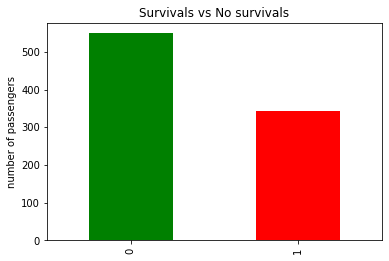

In [13]:
df['Survived'].value_counts().plot(kind='bar',color=['green','red'])
plt.title ("Survivals vs No survivals")
plt.ylabel("number of passengers");

<BarContainer object of 2 artists>

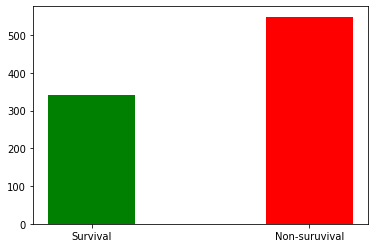

In [14]:
X = ['Survival','Non-suruvival']
Y = [342,549];
plt.bar(X,Y,width=0.4,color=['green','red'])

# STEP 3: proportion (surviving 1st class / 1st class)

In [15]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [16]:
d2 = df.groupby(['Pclass','Survived']).count()

In [17]:
d2

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass Survived                                                             
1      0           80   80   64     80     80      80    80     59        80
       1          136  136  122    136    136     136   136    117       134
2      0           97   97   90     97     97      97    97      3        97
       1           87   87   83     87     87      87    87     13        87
3      0          372  372  270    372    372     372   372      6       372
       1          119  119   85    119    119     119   119      6       119

In [18]:
Survived= (136/216)*100

#PROPORTION FIRST CLASS SURVIVING

In [176]:
str(Survived)+'%'

'62.96296296296296%'

# STEP 4 BAR PLOT Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class Passengers

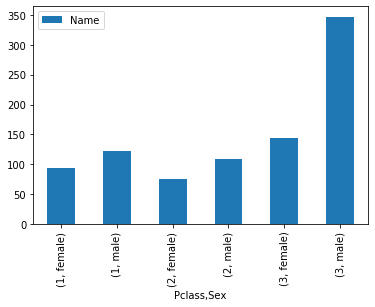

In [21]:
df[['Pclass','Sex','Name']].groupby(['Pclass','Sex']).count().plot.bar()

# STEP 5 Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers

/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/monikaju/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  


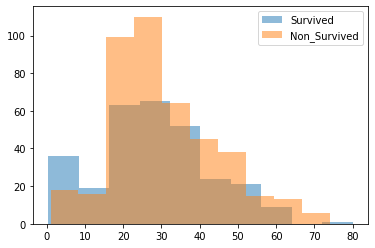

In [35]:
Age_survivals = df['Age'].loc[df['Survived']==1]
Age_non_survivals = df['Age'].loc[df['Survived']==0]
plt.hist(Age_survivals, alpha=0.5)
plt.hist(Age_non_survivals, alpha = 0.5)

plt.legend([Age_survivals, Age_non_survivals], labels=["Survived", "Non_Survived"])


# STEP 6 Calculate the average age for survived and drowned passengers separately.



In [39]:
df2 = df.groupby(['Survived']).mean()

In [40]:
df2

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [41]:
df2['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

# STEP 7 Replace missing age calues by mean age

In [45]:
avg_age = df['Age'].mean()

In [46]:
df['Age'].fillna(avg_age)

PassengerId
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.699118
890    26.000000
891    32.000000
Name: Age, Length: 891, dtype: float64

# STEP 8 Create a table counting the number of surviving/dead passengers separately for 1st 2nd 3rd class and  male/female

In [50]:
df.groupby(['Survived','Pclass','Sex']).size()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64